In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow import keras
from keras.layers import Dropout
from keras.regularizers import l2
from keras import regularizers
import cv2
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [373]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad','surprise']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [374]:
df_test = pd.read_csv('test_set.csv')

In [375]:
df_test.head()

,id_img
0,10052
1,10065
2,10079
3,10095
4,10121


In [376]:
df_train = pd.read_csv('train_set.csv')

In [377]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28821 entries, 0 to 28820
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_img  28821 non-null  int64 
 1   path    28821 non-null  object
 2   label   28821 non-null  object
dtypes: int64(1), object(2)
memory usage: 675.6+ KB


In [378]:
df_train.head()

,id_img,path,label
0,0,../data/images/train/angry\0.jpg,angry
1,1,../data/images/train/angry\1.jpg,angry
2,10,../data/images/train/angry\10.jpg,angry
3,10002,../data/images/train/angry\10002.jpg,angry
4,10016,../data/images/train/angry\10016.jpg,angry


In [379]:
df_train['path'] = df_train['path'].str.replace('\\', '/')
df_train['path'] = df_train['path'].str.replace('../data/images/train/', './data/images/train/')

In [380]:
df_train.head()

,id_img,path,label
0,0,./data/images/train/angry/0.jpg,angry
1,1,./data/images/train/angry/1.jpg,angry
2,10,./data/images/train/angry/10.jpg,angry
3,10002,./data/images/train/angry/10002.jpg,angry
4,10016,./data/images/train/angry/10016.jpg,angry


In [381]:
IMAGE_SIZE = (48,48)
TRAIN_PATH = os.getcwd() + ".\data\data\images\\train"


In [382]:
def read_data(path, im_size):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            image = imread(image_path)
            smallimage = cv2.resize(image, im_size)

            X.append(smallimage)
            y.append(label)
    
    return np.array(X), np.array(y)

In [383]:
X,y = read_data(TRAIN_PATH, IMAGE_SIZE)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=10)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23056, 48, 48)
(5765, 48, 48)
(23056,)
(5765,)


In [384]:
pd.Series(y_train).value_counts()

3    5721
5    3996
4    3965
2    3273
0    3184
6    2568
1     349
Name: count, dtype: int64

In [385]:
pd.Series(y_train).value_counts(normalize=True)

3    0.248135
5    0.173317
4    0.171973
2    0.141959
0    0.138099
6    0.111381
1    0.015137
Name: proportion, dtype: float64

In [386]:
y_train[0:200]

array([3, 4, 2, 6, 0, 4, 4, 4, 6, 4, 0, 2, 3, 5, 2, 3, 6, 3, 0, 3, 6, 4,
       6, 5, 2, 3, 0, 4, 5, 0, 6, 5, 4, 3, 4, 3, 2, 0, 6, 2, 3, 3, 3, 0,
       4, 3, 6, 6, 3, 6, 4, 6, 5, 5, 2, 3, 3, 4, 6, 4, 5, 5, 5, 2, 5, 4,
       3, 5, 0, 3, 3, 3, 6, 5, 3, 6, 4, 3, 4, 6, 4, 4, 4, 5, 3, 6, 5, 5,
       5, 5, 5, 2, 2, 4, 3, 4, 3, 5, 2, 1, 0, 2, 3, 0, 3, 5, 6, 3, 2, 3,
       6, 6, 6, 3, 4, 6, 2, 6, 0, 2, 3, 0, 6, 3, 5, 2, 4, 5, 3, 3, 0, 3,
       3, 5, 2, 4, 0, 4, 4, 5, 0, 5, 5, 3, 6, 3, 4, 3, 3, 0, 5, 6, 3, 0,
       3, 0, 4, 4, 4, 3, 3, 3, 6, 4, 5, 3, 2, 6, 4, 2, 3, 3, 5, 0, 4, 4,
       5, 4, 0, 2, 2, 3, 4, 6, 4, 2, 2, 3, 4, 4, 3, 3, 5, 3, 3, 0, 5, 5,
       3, 6])

neutral


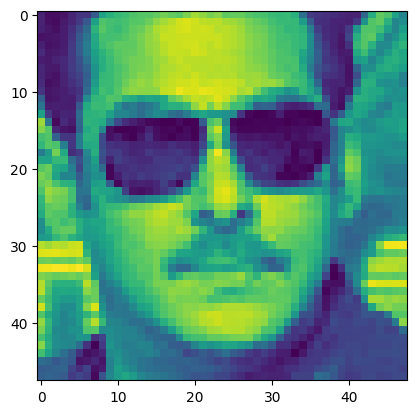

In [387]:
index = np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index])

In [388]:
print(X_train.max())

255


In [389]:
X_train = X_train/255
X_test = X_test/255

In [390]:
print(X_train.max())

1.0


In [391]:
X_train.shape

(23056, 48, 48)

In [392]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu",input_shape=(48, 48, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation="relu",kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation="relu",),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(512, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(7, activation="softmax")
])



In [393]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 10, 10, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 4, 4, 128)       

In [394]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [395]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
145/145 [==============================] - 12s 76ms/step - loss: 1.9126 - accuracy: 0.2388 - val_loss: 1.8171 - val_accuracy: 0.2515
Epoch 2/30
145/145 [==============================] - 10s 72ms/step - loss: 1.8053 - accuracy: 0.2516 - val_loss: 1.7898 - val_accuracy: 0.2515
Epoch 3/30
145/145 [==============================] - 10s 72ms/step - loss: 1.7690 - accuracy: 0.2643 - val_loss: 1.7216 - val_accuracy: 0.3025
Epoch 4/30
145/145 [==============================] - 10s 72ms/step - loss: 1.6762 - accuracy: 0.3288 - val_loss: 1.5891 - val_accuracy: 0.3829
Epoch 5/30
145/145 [==============================] - 11s 75ms/step - loss: 1.5532 - accuracy: 0.3955 - val_loss: 1.5863 - val_accuracy: 0.3833
Epoch 6/30
145/145 [==============================] - 12s 80ms/step - loss: 1.4768 - accuracy: 0.4324 - val_loss: 1.4604 - val_accuracy: 0.4510
Epoch 7/30
145/145 [==============================] - 11s 79ms/step - loss: 1.4058 - accuracy: 0.4621 - val_loss: 1.3847 - val_accuracy:

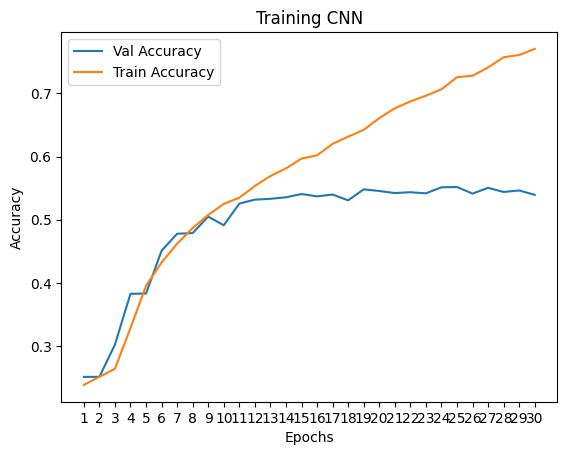

In [396]:
df_hist = pd.DataFrame(history.history, index=np.arange(1,31))

plt.plot(df_hist['val_accuracy'], label="Val Accuracy")
plt.plot(df_hist['accuracy'], label="Train Accuracy")
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(range(1,31))
plt.legend()

In [397]:
results = model.evaluate(X_test, y_test)
results

181/181 [==============================] - 2s 8ms/step - loss: 1.4671 - accuracy: 0.5448


[1.4671293497085571, 0.5448395609855652]

In [398]:
y_pred = model.predict(X_test)
y_pred.round(2)

181/181 [==============================] - 2s 9ms/step


array([[0.  , 0.  , 0.  , ..., 0.98, 0.01, 0.  ],
       [0.12, 0.  , 0.05, ..., 0.15, 0.68, 0.  ],
       [0.23, 0.  , 0.01, ..., 0.46, 0.29, 0.  ],
       ...,
       [0.01, 0.  , 0.01, ..., 0.01, 0.01, 0.  ],
       [0.01, 0.  , 0.01, ..., 0.01, 0.02, 0.  ],
       [0.56, 0.09, 0.21, ..., 0.05, 0.07, 0.  ]], dtype=float32)

angry


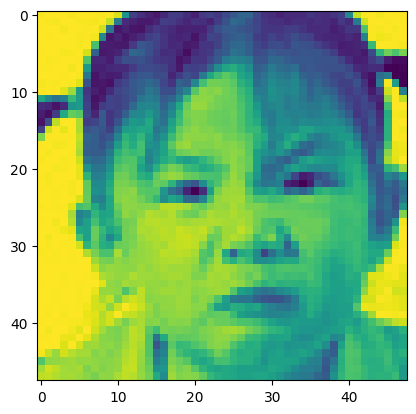

In [399]:
print(class_names[y_test[2]])
plt.imshow(X_test[2])

In [400]:
pred_labels = np.argmax(y_pred, axis=1)
pred_labels

array([4, 5, 4, ..., 3, 3, 0], dtype=int64)

In [401]:
label_pred = [class_names[pred] for pred in pred_labels]
label_pred

['neutral',
 'sad',
 'neutral',
 'fear',
 'happy',
 'angry',
 'sad',
 'neutral',
 'happy',
 'angry',
 'sad',
 'fear',
 'neutral',
 'happy',
 'happy',
 'fear',
 'angry',
 'neutral',
 'fear',
 'sad',
 'fear',
 'sad',
 'angry',
 'neutral',
 'happy',
 'happy',
 'disgust',
 'angry',
 'surprise',
 'surprise',
 'sad',
 'happy',
 'happy',
 'happy',
 'happy',
 'angry',
 'neutral',
 'sad',
 'neutral',
 'happy',
 'fear',
 'sad',
 'angry',
 'happy',
 'sad',
 'happy',
 'angry',
 'happy',
 'surprise',
 'surprise',
 'sad',
 'fear',
 'angry',
 'angry',
 'angry',
 'happy',
 'angry',
 'happy',
 'neutral',
 'happy',
 'happy',
 'happy',
 'angry',
 'fear',
 'neutral',
 'happy',
 'sad',
 'fear',
 'surprise',
 'angry',
 'happy',
 'fear',
 'sad',
 'happy',
 'sad',
 'happy',
 'fear',
 'sad',
 'sad',
 'neutral',
 'neutral',
 'sad',
 'fear',
 'sad',
 'angry',
 'sad',
 'happy',
 'angry',
 'surprise',
 'sad',
 'neutral',
 'happy',
 'angry',
 'fear',
 'sad',
 'fear',
 'surprise',
 'neutral',
 'neutral',
 'sad',
 's

<Axes: >

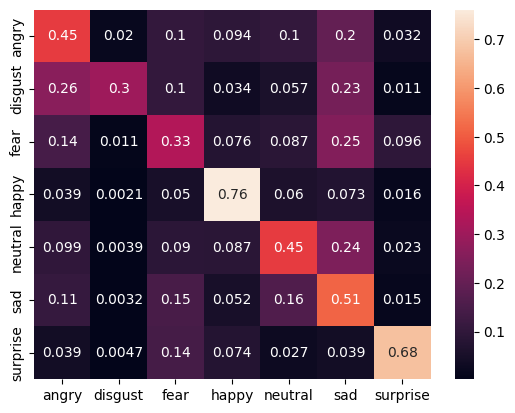

In [402]:
c_mat = confusion_matrix(y_test, pred_labels, normalize='true')
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

In [403]:
# df_test

In [404]:
# class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad','surprise']
# class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
# class_names_label

In [405]:
# IMAGE_SIZE = (48,48)
# TRAIN_PATH = os.getcwd() + ".\data\data\images\\train"

In [406]:
# def read_data(path, im_size):
#     X = []
#     y = []

#     for folder in os.listdir(path):
#         label = class_names_label[folder]
#         folder_path = os.path.join(path, folder)

#         for file in os.listdir(folder_path):
#             image_path = os.path.join(folder_path, file)
#             image = imread(image_path)
#             smallimage = cv2.resize(image, im_size)

#             X.append(smallimage)
#             y.append(label)
    
#     return np.array(X), np.array(y)

In [407]:
# X,y = read_data(TRAIN_PATH, IMAGE_SIZE)

In [419]:
def construir_ruta(row):
    ruta_base = r'./data/data/images/test'  # ajusta la ruta base según tu estructura de carpetas
    return f"{ruta_base}/{row['id_img']}.jpg"

# Aplica la función para crear la nueva columna 'path'
df_test['path'] = df_test.apply(construir_ruta, axis=1)

In [420]:
df_test


,id_img,path
0,10052,./data/data/images/test/10052.jpg
1,10065,./data/data/images/test/10065.jpg
2,10079,./data/data/images/test/10079.jpg
3,10095,./data/data/images/test/10095.jpg
4,10121,./data/data/images/test/10121.jpg
...,...,...
7061,9806,./data/data/images/test/9806.jpg
7062,9830,./data/data/images/test/9830.jpg
7063,9853,./data/data/images/test/9853.jpg
7064,9878,./data/data/images/test/9878.jpg


In [421]:
def cargar_imagenes(df_test):
    imagenes = []

    for index, row in df_test.iterrows():
        image_path = row['path']
        image = imread(image_path)
        imagenes.append(image)
    
    return np.array(imagenes)

imagenes_array = cargar_imagenes(df_test)

In [426]:
len(imagenes_array)

7066

In [433]:
img_arr_norm = imagenes_array/255

In [ ]:
img_arr_norm

In [435]:
para_label_test = model.predict(img_arr_norm)

221/221 [==============================] - 2s 8ms/step


In [437]:
pred_labels_test = np.argmax(para_label_test, axis=1)
pred_labels_test

array([0, 2, 0, ..., 6, 3, 2], dtype=int64)

In [ ]:
label_test = [class_names[pred] for pred in pred_labels_test]
label_test

In [ ]:
df_test

In [442]:
# Crear un DataFrame con las predicciones y el 'id_img'
result_df = pd.DataFrame({'id_img': df_test['id_img'], 'label': label_test})

# Mostrar el DataFrame con las predicciones
print(result_df)

      id_img     label
0      10052     angry
1      10065      fear
2      10079     angry
3      10095       sad
4      10121     angry
...      ...       ...
7061    9806  surprise
7062    9830       sad
7063    9853  surprise
7064    9878     happy
7065     993      fear

[7066 rows x 2 columns]


In [443]:
result_df.to_csv('sumision1.csv', index=False)